In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [3]:
!pip install xgboost


In [4]:
df = pd.read_csv("/content/imdb_clean2.csv")

In [5]:
df = df[df["sentiment"].isin(["positive", "negative"])]
print(df.shape)
print(df["sentiment"].value_counts())


(49582, 2)
sentiment
positive    24884
negative    24698
Name: count, dtype: int64


In [6]:
x = df['review']
y = df['sentiment'].map(lambda x: 1 if x == "positive" else 0)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=67, stratify=y
)

print("train size:", x_train.shape[0])
print("test size:", x_test.shape[0])


train size: 39665
test size: 9917


In [7]:
vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

print("Shape of TF-IDF matrix:", x_train_vec.shape)


Shape of TF-IDF matrix: (39665, 20000)


In [8]:
def evaluate_model(name, model, x_test, y_test):
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()




Logistic Regression Results:
Accuracy: 0.9006
Precision: 0.8959
Recall: 0.9074
F1-score: 0.9016

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      4940
           1       0.90      0.91      0.90      4977

    accuracy                           0.90      9917
   macro avg       0.90      0.90      0.90      9917
weighted avg       0.90      0.90      0.90      9917



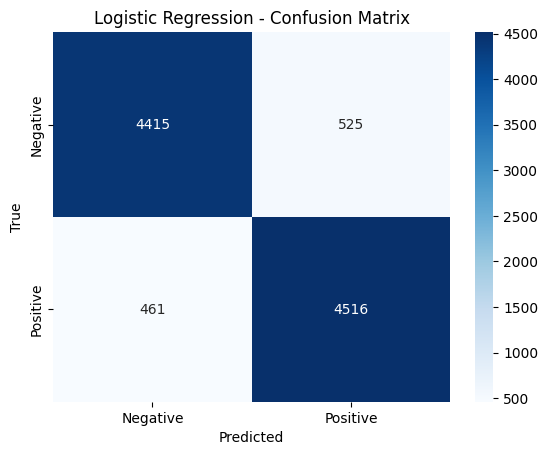

In [9]:
lr = LogisticRegression(max_iter=500)
lr.fit(x_train_vec, y_train)

evaluate_model("Logistic Regression", lr, x_test_vec, y_test)



Random Forest Results:
Accuracy: 0.8581
Precision: 0.8569
Recall: 0.8612
F1-score: 0.8590

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4940
           1       0.86      0.86      0.86      4977

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



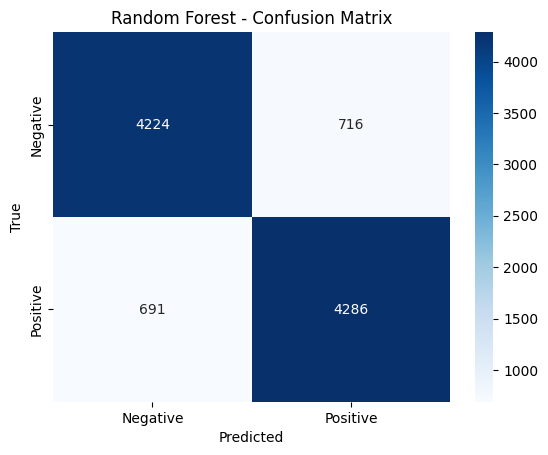

In [11]:
rf = RandomForestClassifier(n_estimators=150, random_state=67)
rf.fit(x_train_vec, y_train)

evaluate_model("Random Forest", rf, x_test_vec, y_test)



SVM Results:
Accuracy: 0.9006
Precision: 0.9014
Recall: 0.9003
F1-score: 0.9009

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      4940
           1       0.90      0.90      0.90      4977

    accuracy                           0.90      9917
   macro avg       0.90      0.90      0.90      9917
weighted avg       0.90      0.90      0.90      9917



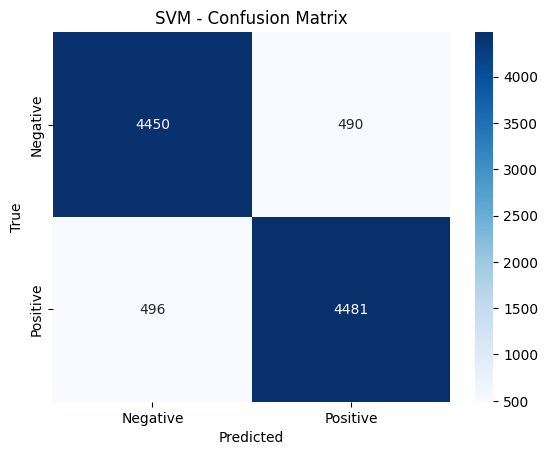

In [12]:
svm = LinearSVC(max_iter=3000, random_state=67)
svm.fit(x_train_vec, y_train)

evaluate_model("SVM", svm, x_test_vec, y_test)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:34:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Results:
Accuracy: 0.8704
Precision: 0.8578
Recall: 0.8893
F1-score: 0.8732

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      4940
           1       0.86      0.89      0.87      4977

    accuracy                           0.87      9917
   macro avg       0.87      0.87      0.87      9917
weighted avg       0.87      0.87      0.87      9917



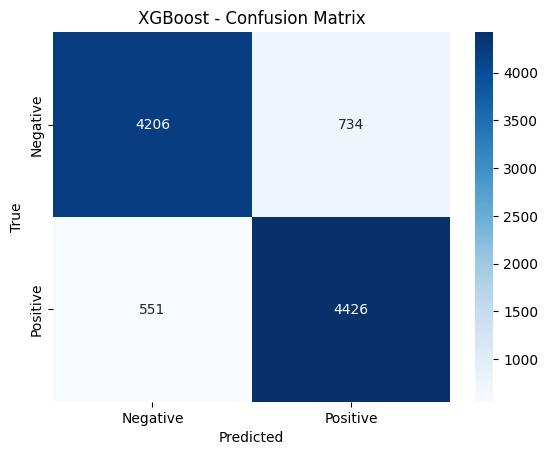

In [13]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=67,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb.fit(x_train_vec, y_train)

evaluate_model("XGBoost", xgb, x_test_vec, y_test)



Naive Bayes Results:
Accuracy: 0.8695
Precision: 0.8650
Recall: 0.8768
F1-score: 0.8709

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      4940
           1       0.87      0.88      0.87      4977

    accuracy                           0.87      9917
   macro avg       0.87      0.87      0.87      9917
weighted avg       0.87      0.87      0.87      9917



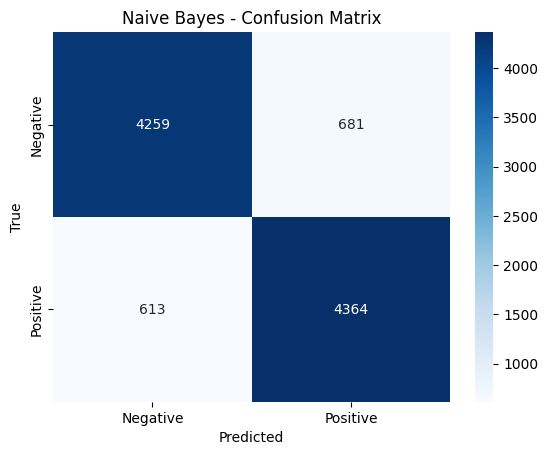

In [14]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(alpha=0.1, fit_prior=True)

nb.fit(x_train_vec, y_train)

y_pred_nb = nb.predict(x_test_vec)
evaluate_model("Naive Bayes",nb, x_test_vec,y_test)



                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.900575   0.895854  0.907374  0.901577
1        Random Forest  0.858122   0.856857  0.861161  0.859004
2                  SVM  0.900575   0.901428  0.900342  0.900885
3              XGBoost  0.870425   0.857752  0.889291  0.873237
4          Naive Bayes  0.869517   0.865015  0.876833  0.870884


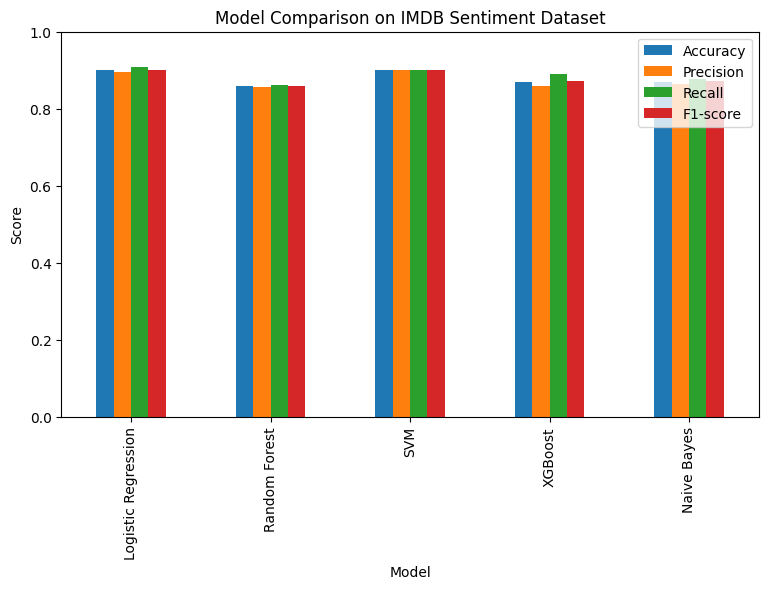

In [15]:
models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "SVM": svm,
    "XGBoost": xgb,
    "Naive Bayes": nb
}


results = []
for name, model in models.items():
    y_pred = model.predict(x_test_vec)
    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])
print(results_df)

results_df.set_index("Model").plot(kind="bar", figsize=(9,5))
plt.title("Model Comparison on IMDB Sentiment Dataset")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()
